1. Importing the necessary modules

In [2]:
import pandas as pd
import folium
import re
import random
import seaborn as sns

2. Load the dataset

In [ ]:
df_ast_approach = pd.read_csv("nasa_close_approach_2024_2026.csv", low_memory=False)

In [4]:
df_ast_approach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    1912 non-null   object 
 1   Close-Approach (CA) Date  1912 non-null   object 
 2   CA DistanceNominal (au)   1912 non-null   float64
 3   CA DistanceMinimum (au)   1912 non-null   float64
 4   V relative(km/s)          1912 non-null   float64
 5   V infinity(km/s)          1912 non-null   float64
 6   H(mag)                    1912 non-null   float64
 7   Diameter                  1912 non-null   object 
 8   Rarity                    1912 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 134.6+ KB


In [5]:
df_ast_approach.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity
0,(2024 NH),2024-Jul-23 03:18 ± < 00:01,0.03363,0.03352,5.46,5.44,25.4,22 m - 49 m,0
1,(2024 PG1),2024-Jul-23 03:55 ± 00:14,0.04740,0.04681,11.53,11.53,24.1,40 m - 90 m,0
2,(2024 LY2),2024-Jul-23 07:52 ± < 00:01,0.03071,0.03070,7.82,7.81,22.8,72 m - 160 m,1
3,(2024 OP),2024-Jul-24 03:51 ± < 00:01,0.02358,0.02349,10.70,10.69,24.3,37 m - 82 m,0
4,(2024 OA),2024-Jul-24 06:05 ± < 00:01,0.00601,0.00600,13.28,13.25,25.3,24 m - 53 m,1


3. Strip the Diameter Range (m) into two columns for with minimum and maximum.
4. Calculate the Median using the minumum and Maximum

In [6]:
df_ast_approach[['Diameter_Min', 'Diameter_Max']] = df_ast_approach['Diameter'].str.extract(r'(\d+) m - +(\d+) m').astype(float)
df_ast_approach['Diameter_Median'] = (df_ast_approach['Diameter_Min'] + df_ast_approach['Diameter_Max']) / 2

In [7]:
df_ast_approach.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity,Diameter_Min,Diameter_Max,Diameter_Median
0,(2024 NH),2024-Jul-23 03:18 ± < 00:01,0.03363,0.03352,5.46,5.44,25.4,22 m - 49 m,0,22.0,49.0,35.5
1,(2024 PG1),2024-Jul-23 03:55 ± 00:14,0.04740,0.04681,11.53,11.53,24.1,40 m - 90 m,0,40.0,90.0,65.0
2,(2024 LY2),2024-Jul-23 07:52 ± < 00:01,0.03071,0.03070,7.82,7.81,22.8,72 m - 160 m,1,72.0,160.0,116.0
3,(2024 OP),2024-Jul-24 03:51 ± < 00:01,0.02358,0.02349,10.70,10.69,24.3,37 m - 82 m,0,37.0,82.0,59.5
4,(2024 OA),2024-Jul-24 06:05 ± < 00:01,0.00601,0.00600,13.28,13.25,25.3,24 m - 53 m,1,24.0,53.0,38.5


In [8]:
# df_ast_approach['KE'] = (3.14/12) * 3000 * (df_ast_approach['Diameter_Median']) ** 3 * (df_ast_approach['V relative(km/s)']) ** 2

In [9]:
# df_ast_approach.head(10)

Calculate the Radius using Diameter / 2

In [10]:
df_ast_approach['radius'] = df_ast_approach['Diameter_Median'] / 2

Calculate the Volume using the volume formula of a sphere. 4/3 * pi * r^3

In [11]:
df_ast_approach['vol'] = (4/3) * 3.14 * (df_ast_approach['radius'] ** 3)

Calculating the mass assuming the density of 3000 kg/m^3

In [12]:
df_ast_approach['mass'] = 3000 * df_ast_approach['vol']

Calculate the Kinetic Energy using the formula 1/2 * m * v ^2

In [13]:
df_ast_approach['kinetic_energy'] = (1/2 * df_ast_approach['mass'] * ( (df_ast_approach['V relative(km/s)'] * 1000) ** 2)) / 1000000000000

In [14]:
df_ast_approach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    1912 non-null   object 
 1   Close-Approach (CA) Date  1912 non-null   object 
 2   CA DistanceNominal (au)   1912 non-null   float64
 3   CA DistanceMinimum (au)   1912 non-null   float64
 4   V relative(km/s)          1912 non-null   float64
 5   V infinity(km/s)          1912 non-null   float64
 6   H(mag)                    1912 non-null   float64
 7   Diameter                  1912 non-null   object 
 8   Rarity                    1912 non-null   int64  
 9   Diameter_Min              1771 non-null   float64
 10  Diameter_Max              1771 non-null   float64
 11  Diameter_Median           1771 non-null   float64
 12  radius                    1771 non-null   float64
 13  vol                       1771 non-null   float64
 14  mass    

In [15]:
df_ast_approach.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity,Diameter_Min,Diameter_Max,Diameter_Median,radius,vol,mass,kinetic_energy
0,(2024 NH),2024-Jul-23 03:18 ± < 00:01,0.03363,0.03352,5.46,5.44,25.4,22 m - 49 m,0,22.0,49.0,35.5,17.75,23413.344583,7.024003e+07,1046.983895
1,(2024 PG1),2024-Jul-23 03:55 ± 00:14,0.04740,0.04681,11.53,11.53,24.1,40 m - 90 m,0,40.0,90.0,65.0,32.50,143720.416667,4.311612e+08,28659.482310
2,(2024 LY2),2024-Jul-23 07:52 ± < 00:01,0.03071,0.03070,7.82,7.81,22.8,72 m - 160 m,1,72.0,160.0,116.0,58.00,816868.906667,2.450607e+09,74930.241192
3,(2024 OP),2024-Jul-24 03:51 ± < 00:01,0.02358,0.02349,10.70,10.69,24.3,37 m - 82 m,0,37.0,82.0,59.5,29.75,110237.484583,3.307125e+08,18931.634415
4,(2024 OA),2024-Jul-24 06:05 ± < 00:01,0.00601,0.00600,13.28,13.25,25.3,24 m - 53 m,1,24.0,53.0,38.5,19.25,29864.867083,8.959460e+07,7900.380263


In [16]:
df_ast_approach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    1912 non-null   object 
 1   Close-Approach (CA) Date  1912 non-null   object 
 2   CA DistanceNominal (au)   1912 non-null   float64
 3   CA DistanceMinimum (au)   1912 non-null   float64
 4   V relative(km/s)          1912 non-null   float64
 5   V infinity(km/s)          1912 non-null   float64
 6   H(mag)                    1912 non-null   float64
 7   Diameter                  1912 non-null   object 
 8   Rarity                    1912 non-null   int64  
 9   Diameter_Min              1771 non-null   float64
 10  Diameter_Max              1771 non-null   float64
 11  Diameter_Median           1771 non-null   float64
 12  radius                    1771 non-null   float64
 13  vol                       1771 non-null   float64
 14  mass    

Calculate the energy equivalent using the Tsar Bomba explosion which released 210,000TJ of energy.

In [17]:
df_ast_approach['count_tsar_bomb'] = df_ast_approach['kinetic_energy'] / 210000

Compare the energy of asteroids using the energy released from the Hiroshima Bomb.

In [18]:
df_ast_approach['count_hiroshima_bomb'] = df_ast_approach['kinetic_energy'] / 63

In [19]:
df_ast_approach.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity,Diameter_Min,Diameter_Max,Diameter_Median,radius,vol,mass,kinetic_energy,count_tsar_bomb,count_hiroshima_bomb
0,(2024 NH),2024-Jul-23 03:18 ± < 00:01,0.03363,0.03352,5.46,5.44,25.4,22 m - 49 m,0,22.0,49.0,35.5,17.75,23413.344583,7.024003e+07,1046.983895,0.004986,16.618792
1,(2024 PG1),2024-Jul-23 03:55 ± 00:14,0.04740,0.04681,11.53,11.53,24.1,40 m - 90 m,0,40.0,90.0,65.0,32.50,143720.416667,4.311612e+08,28659.482310,0.136474,454.912418
2,(2024 LY2),2024-Jul-23 07:52 ± < 00:01,0.03071,0.03070,7.82,7.81,22.8,72 m - 160 m,1,72.0,160.0,116.0,58.00,816868.906667,2.450607e+09,74930.241192,0.356811,1189.368908
3,(2024 OP),2024-Jul-24 03:51 ± < 00:01,0.02358,0.02349,10.70,10.69,24.3,37 m - 82 m,0,37.0,82.0,59.5,29.75,110237.484583,3.307125e+08,18931.634415,0.090151,300.502134
4,(2024 OA),2024-Jul-24 06:05 ± < 00:01,0.00601,0.00600,13.28,13.25,25.3,24 m - 53 m,1,24.0,53.0,38.5,19.25,29864.867083,8.959460e+07,7900.380263,0.037621,125.402861


Calculate the damage estimation using number of hiroshima bombs as a metric.

In [20]:
df_ast_approach['dmg_est_hiroshima'] = df_ast_approach['count_hiroshima_bomb'] * 1.0

Calculate the damage estimation using number of Tsar Bomba as a metric.

In [21]:
df_ast_approach['dmg_est_tsar'] = df_ast_approach['count_tsar_bomb'] * 37

In [22]:
df_ast_approach.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity,Diameter_Min,Diameter_Max,Diameter_Median,radius,vol,mass,kinetic_energy,count_tsar_bomb,count_hiroshima_bomb,dmg_est_hiroshima,dmg_est_tsar
0,(2024 NH),2024-Jul-23 03:18 ± < 00:01,0.03363,0.03352,5.46,5.44,25.4,22 m - 49 m,0,22.0,49.0,35.5,17.75,23413.344583,7.024003e+07,1046.983895,0.004986,16.618792,16.618792,0.184469
1,(2024 PG1),2024-Jul-23 03:55 ± 00:14,0.04740,0.04681,11.53,11.53,24.1,40 m - 90 m,0,40.0,90.0,65.0,32.50,143720.416667,4.311612e+08,28659.482310,0.136474,454.912418,454.912418,5.049528
2,(2024 LY2),2024-Jul-23 07:52 ± < 00:01,0.03071,0.03070,7.82,7.81,22.8,72 m - 160 m,1,72.0,160.0,116.0,58.00,816868.906667,2.450607e+09,74930.241192,0.356811,1189.368908,1189.368908,13.201995
3,(2024 OP),2024-Jul-24 03:51 ± < 00:01,0.02358,0.02349,10.70,10.69,24.3,37 m - 82 m,0,37.0,82.0,59.5,29.75,110237.484583,3.307125e+08,18931.634415,0.090151,300.502134,300.502134,3.335574
4,(2024 OA),2024-Jul-24 06:05 ± < 00:01,0.00601,0.00600,13.28,13.25,25.3,24 m - 53 m,1,24.0,53.0,38.5,19.25,29864.867083,8.959460e+07,7900.380263,0.037621,125.402861,125.402861,1.391972


Get a sample size of three asteroids from the dataset.

In [23]:
df_ast_sample = df_ast_approach.sample(3)

In [24]:
df_ast_sample.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity,Diameter_Min,Diameter_Max,Diameter_Median,radius,vol,mass,kinetic_energy,count_tsar_bomb,count_hiroshima_bomb,dmg_est_hiroshima,dmg_est_tsar
2,(2024 LY2),2024-Jul-23 07:52 ± < 00:01,0.03071,0.03070,7.82,7.81,22.8,72 m - 160 m,1,72.0,160.0,116.0,58.00,816868.906667,2.450607e+09,74930.241192,0.356811,1189.368908,1189.368908,13.201995
602,(2024 VP1),2024-Nov-04 10:17 ± < 00:01,0.00858,0.00856,8.95,8.91,28.4,5.5 m - 12 m,0,5.0,12.0,8.5,4.25,321.392083,9.641762e+05,38.616464,0.000184,0.612960,0.612960,0.006804
131,(2024 RC31),2024-Sep-01 18:23 ± 08:17,0.00690,0.00674,8.00,7.95,26.9,11 m - 25 m,0,11.0,25.0,18.0,9.00,3052.080000,9.156240e+06,292.999680,0.001395,4.650789,4.650789,0.051624


Generate a map using Folium library.

In [25]:
m = folium.Map(location=[41.8798675,-87.62742], tiles="OpenStreetMap", zoom_start=12)

fg_tsar = folium.FeatureGroup(name="Tsar Bomba", show=False).add_to(m)
fg_hiroshima = folium.FeatureGroup(name="Hiroshima Bomb", show=False).add_to(m)
fg_cxl = folium.FeatureGroup(name="Chixclub", show=False).add_to(m)
fg_asteroid = folium.FeatureGroup(name="Asteroids", show=True).add_to(m)

# Chicxulub
folium.Circle(
    location=[41.8798675,-87.62742],
    radius=1609.34 * 58,
    popup='Chicxulub \n Radius: 58 Miles',
    color='#808080',
    fill=True,
    fill_color='#808080',
    show=False
).add_to(fg_cxl)

# TSAR
folium.Circle(
    location=[41.8798675,-87.62742],
    radius=1609.34 * 31,
    popup='Tsar Bomba \n Radius: 31 Miles',
    color='#808080',
    fill=True,
    fill_color='#808080',
    show=False
).add_to(fg_tsar)

# Hiroshima
folium.Circle(
    location=[41.8798675,-87.62742],
    radius=1609.34,
    popup='Hiroshima Bomb \nRadius: 1 Mile',
    color='#32CD32',
    fill=True,
    fill_color='#32CD32'
).add_to(fg_hiroshima)

for asteroid in df_ast_sample.itertuples():
    asteroid_color = "#%06x" % random.randint(0, 0xFFFFFF),
    folium.Circle(
        location=[41.8798675,-87.62742],
        popup='Name: %s \n\n Radius: %.1f Miles' % (asteroid.Object, asteroid.dmg_est_tsar),
        radius=asteroid.dmg_est_tsar * 1609.34,
        color = '#FFFF00',
        fill=True,
        fill_color = '#FFFF00',
    ).add_to(fg_asteroid)

folium.LayerControl().add_to(m)

In [26]:
m

Logic to find 25th percentile , median and 75th percentile diameter size of asteroids.

In [27]:
top_half = df_ast_approach[df_ast_approach["Diameter_Median"] > df_ast_approach["Diameter_Median"].median()]
bottom_half = df_ast_approach[df_ast_approach["Diameter_Median"] <= df_ast_approach["Diameter_Median"].median()]

median_asteroid = bottom_half[bottom_half["Diameter_Median"] == bottom_half["Diameter_Median"].max()].sample(1)
q1_asteroid = bottom_half[bottom_half["Diameter_Median"] == bottom_half["Diameter_Median"].median()].sample(1)
q3_asteroid = top_half[top_half["Diameter_Median"] == top_half["Diameter_Median"].median()].sample(1)

ast_final = pd.concat([median_asteroid, q1_asteroid, q3_asteroid])
ast_final

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity,Diameter_Min,Diameter_Max,Diameter_Median,radius,vol,mass,kinetic_energy,count_tsar_bomb,count_hiroshima_bomb,dmg_est_hiroshima,dmg_est_tsar
1013,(2025 BQ),2025-Jan-15 06:15 ± < 00:01,0.03002,0.02982,11.69,11.68,26.2,15 m - 34 m,0,15.0,34.0,24.5,12.25,7696.205417,2.308862e+07,1577.600126,0.007512,25.041272,25.041272,0.277958
1884,(2019 FQ1),2026-Apr-03 04:39 ± 1_10:24,0.02454,0.01670,10.10,10.09,27.2,9.7 m - 22 m,0,7.0,22.0,14.5,7.25,1595.447083,4.786341e+06,244.127335,0.001163,3.875037,3.875037,0.043013
1795,(2025 OG1),2025-Sep-05 14:36 ± 1_00:01,0.03697,0.03605,4.18,4.16,25.1,25 m - 56 m,0,25.0,56.0,40.5,20.25,34765.098750,1.042953e+08,911.144567,0.004339,14.462612,14.462612,0.160535


In [28]:
#ast_final = top_half.sample(1)
#ast_final = bottom_half.sample(1)
#ast_final = median_asteroid.sample(1)

Generate a Linear regression model of the Diameter and Kinetic Energy.

<Axes: xlabel='Diameter_Median', ylabel='kinetic_energy'>

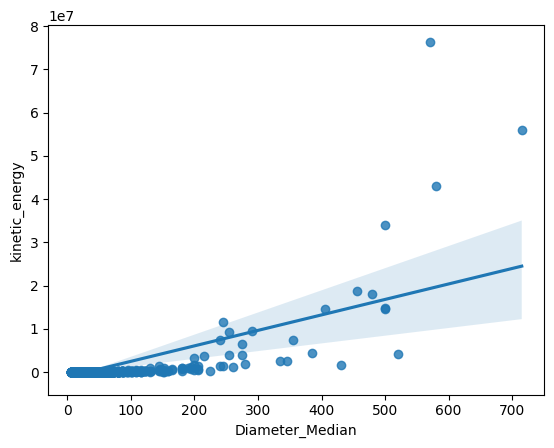

In [29]:
sns.regplot(data=df_ast_approach, x="Diameter_Median", y="kinetic_energy")

<Axes: xlabel='Diameter_Median', ylabel='dmg_est_tsar'>

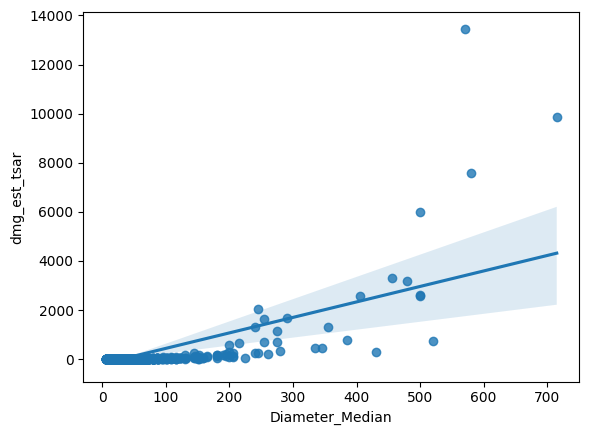

In [32]:
sns.regplot(data=df_ast_approach, x="Diameter_Median", y="dmg_est_tsar")